In [42]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
# import imgaug as ia
# import imgaug.augmenters as iaa
# import cv2

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, HistGradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import randint

np.random.seed(42)

# Data

In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
# print(mnist.DESCR)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

#Normalisering
X = mnist["data"] / 255.0



In [10]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


# Data pre-processing

In [27]:
# Dela upp datan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Skapa ett mindre träningsset för modellval och hyperparamteroptimisering
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Skapa och träna StandardScaler på tränings- och testdatan
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Spara StandardScaler-objektet
joblib.dump(scaler, 'scaler.joblib')

print("StandardScaler sparad som scaler.joblib")

StandardScaler sparad som scaler.joblib


# Modelling

### Random Forest

In [38]:
rf = RandomForestClassifier(random_state=42)

#Hyperparametarar till RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

#Instansiering av GridSearchCV sedan tränas och korsvalideras modellen
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

#Bästa modellen och score efter korsvalideringen
best_rf = grid_search_rf.best_estimator_
best_score_rf = grid_search_rf.best_score_

print(f"Bästa hyperparametrarna: {grid_search_rf.best_params_}")
print(f"Bästa score: {best_score_rf}")



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Bästa hyperparametrarna: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Bästa score: 0.9666666666666668


### Extra Trees

In [28]:
et = ExtraTreesClassifier(random_state=42)

param_grid_et = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search_et = GridSearchCV(et, param_grid_et, cv=3, n_jobs=-1, verbose=1)
grid_search_et.fit(X_train_small, y_train_small)

#Bästa ExtraTees-modellen
best_et = grid_search_et.best_estimator_

#Bästa score
best_score_et = grid_search_et.best_score_

print(f"Bästa hyperparametrarna: {grid_search_et.best_params_}")
print(f"Bästa score: {best_score_et}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Bästa hyperparametrarna: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Bästa score: 0.9626333333333333


### XGB

In [31]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss',subsample=0.8, colsample_bytree=0.8)

param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_small, y_train_small)

#Bästa modellen och score efter korsvalideringen
best_xgb = grid_search_xgb.best_estimator_

best_score_xgb = grid_search_xgb.best_score_

print(f"Bästa hyperparametrarna: {grid_search_xgb.best_params_}")
print(f"Bästa score: {best_score_xgb}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\Dator\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:54:54] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Bästa hyperparametrarna: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Bästa score: 0.9611333333333333


### HistGradientBoost

In [30]:
# HistGradientBoostingClassifier-modell
hgb = HistGradientBoostingClassifier(random_state=42)

# Parameter Grid för HistGradientBoostingClassifier
param_grid_hgb = {
    'max_iter': [50, 100],  # Antal träd (iterations)
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

# GridSearchCV för HistGradientBoostingClassifier
grid_search_hgb = GridSearchCV(hgb, param_grid_hgb, cv=3, n_jobs=-1, verbose=1)
grid_search_hgb.fit(X_train_small, y_train_small)

# Bästa HistGradientBoostingClassifier-modell
best_hgb = grid_search_hgb.best_estimator_

# Bästa HistGradientBoostingClassifier-score
best_score_hgb = grid_search_hgb.best_score_

print(f"Bästa hyperparametrarna: {grid_search_hgb.best_params_}")
print(f"Bästa HistGradientBoostingClassifier-score: {best_score_hgb}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Bästa hyperparametrarna: {'learning_rate': 0.1, 'max_depth': 6, 'max_iter': 100}
Bästa HistGradientBoostingClassifier-score: 0.9649333333333333


### VotingClassifier

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('et', best_et),
    ('xgb', best_xgb),
    ('hgb', best_hgb)
], voting='soft')

voting_clf.fit(X_train_small, y_train_small)

# Beräkna och skriv ut score
voting_score = voting_clf.score(X_test_small, y_test_small)
print(f"Voting Classifier Score: {voting_score}")

c:\Users\Dator\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:13:03] WARNING: D:\bld\xgboost-split_1737531313485\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Score: 0.9603


Random Forest Score: 0.9666666666666668
Extra Trees Score: 0.9626333333333333
XGBoost Score: 0.9611333333333333
HistGradientBoosting Score: 0.9649333333333333
Voting Classifier Score: 0.9603


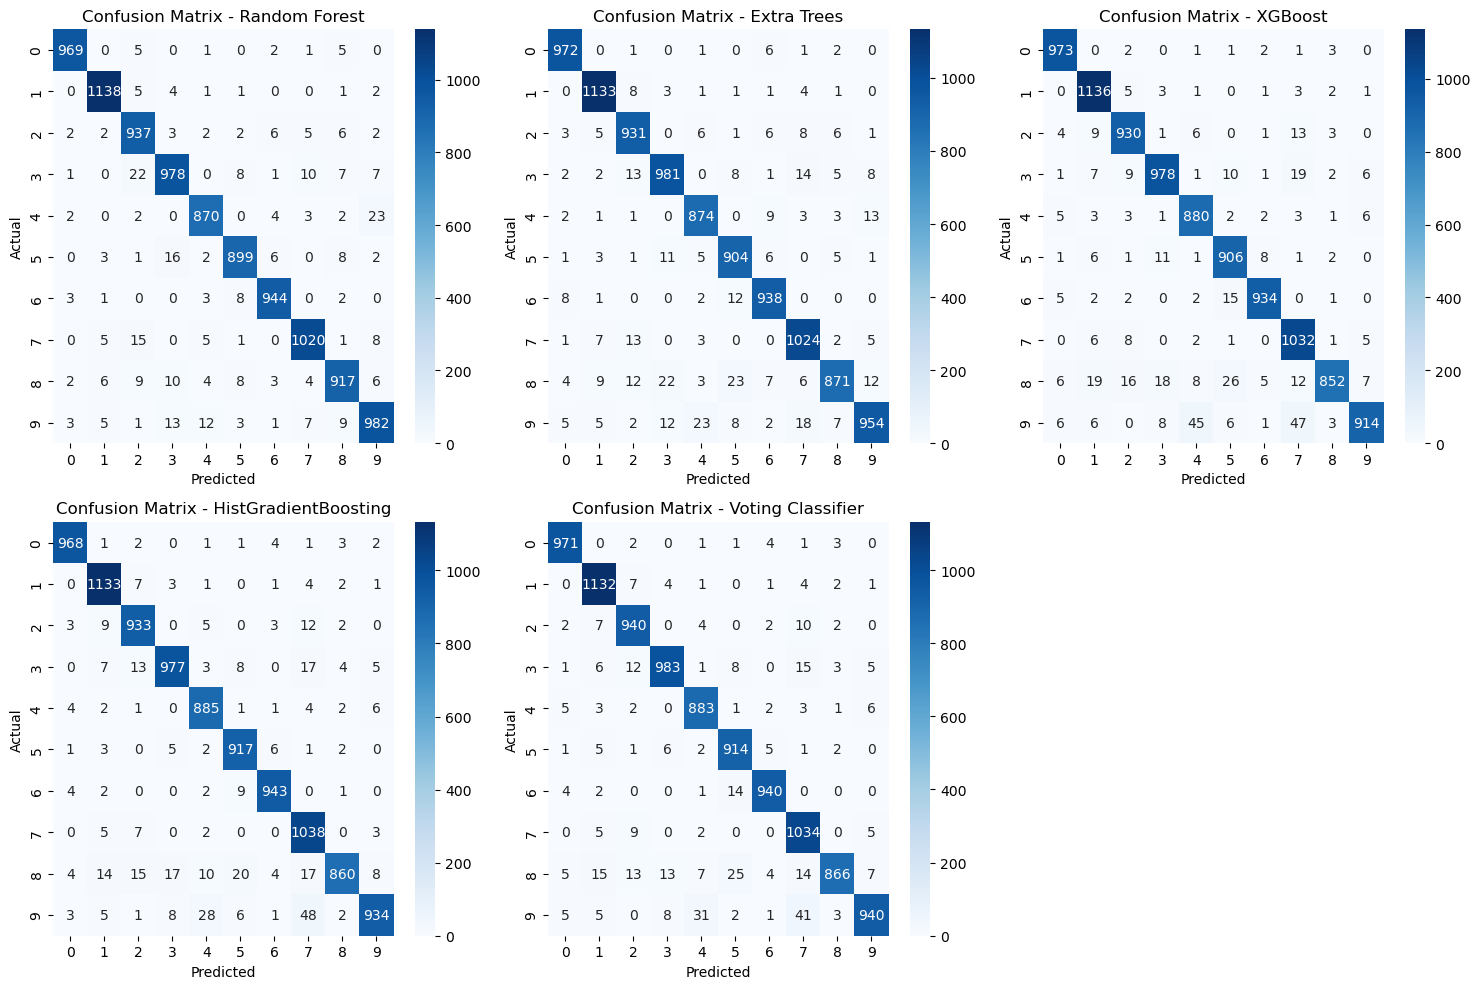

In [43]:
# Skriv ut scores
print(f"Random Forest Score: {best_score_rf}")
print(f"Extra Trees Score: {best_score_et}")
print(f"XGBoost Score: {best_score_xgb}")
print(f"HistGradientBoosting Score: {best_score_hgb}")
print(f"Voting Classifier Score: {voting_score}")

# Förutsägelser
y_pred_rf = best_rf.predict(X_test)
y_pred_et = best_et.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_hgb = best_hgb.predict(X_test)
y_pred_voting = voting_clf.predict(X_test)

# Skapa och plotta förvirringsmatriser
models = {
    "Random Forest": y_pred_rf,
    "Extra Trees": y_pred_et,
    "XGBoost": y_pred_xgb,
    "HistGradientBoosting": y_pred_hgb,
    "Voting Classifier": y_pred_voting
}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Skapar en figur med 2 rader och 3 kolumner

for ax, (name, y_pred) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix - {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

axes[1, 2].axis('off')  # Tar bort den sista delplotten eftersom vi bara har 5 matriser

plt.tight_layout()
plt.show()

### Prediktion

In [ ]:
# Använd VotingClassifier-resultaten
y_pred_voting = voting_clf.predict(X_test)
y_pred_rf = rf.predict(X_test)

y_pred_final = y_pred_voting

print("Voting Classifier Results:")
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

# Utvärdera VotingClassifier-modellen
print("Final Voting Classifier Results:")
print(classification_report(y_test, y_pred_final))
print(confusion_matrix(y_test, y_pred_final))

Final Voting Classifier Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1152
           2       0.96      0.98      0.97       967
           3       0.97      0.96      0.97      1034
           4       0.97      0.97      0.97       906
           5       0.98      0.97      0.98       937
           6       0.99      0.98      0.98       961
           7       0.97      0.98      0.98      1055
           8       0.96      0.97      0.96       969
           9       0.96      0.96      0.96      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 970    0    2    0    1    1    1    1    6    1]
 [   0 1136    6    3    1    0    0    2    3    1]
 [   2    2  947    1    4    0    1    4    6    0]
 [   1    0   12  997    0    4    1    7    4   

### Prediktion RandomForest

In [17]:
# Beräkna och skriv ut predict score på testdatan
y_pred_rf = best_rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.98      0.99      0.98      1152
           2       0.98      0.99      0.99       967
           3       0.98      0.98      0.98      1034
           4       0.98      0.99      0.99       906
           5       0.96      0.99      0.98       937
           6       0.99      0.99      0.99       961
           7       0.97      0.99      0.98      1055
           8       0.99      0.93      0.96       969
           9       0.98      0.95      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 978    0    0    0    0    0    2    1    1    1]
 [   0 1146    0    3    1    0    0    1    0    1]
 [   0    4  958    0    0    0    0    4    1    0]
 [   1    0    4 1013    0    3    0   10    1    2]
 [   0

### Undersöker Mnist mot modellens prediktion

In [20]:
import random

# Välj en slumpmässig bild från testdatan
rand_index = random.randint(0, len(X_test) - 1)  
test_img = X_test[rand_index].reshape(1, -1)  # Hämta bilden och formatera

# Modellens prediktion
test_pred = voting_clf.predict(test_img)[0]  

# Faktisk siffra från testdatan
actual_label = y_test[rand_index]  

# Visa bilden och jämför prediktionen med den verkliga siffran
plt.imshow(test_img.reshape(28, 28), cmap="gray")
plt.title(f"Prediktion: {test_pred} | Faktisk siffra: {actual_label}")
plt.show()

NameError: name 'voting_clf' is not defined

### Letar upp 5 bilder som modellen predikterar fel

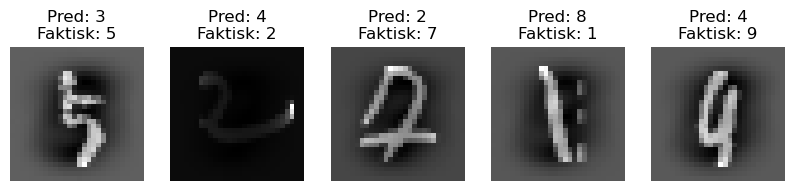

In [230]:
import numpy as np
import matplotlib.pyplot as plt

# Gör prediktioner på hela testdatan
y_pred = voting_clf.predict(X_test)

# Hitta index där prediktionen är FEL
misclassified_indexes = np.where(y_pred != y_test)[0]

# Välj upp till 5 felklassificerade exempel (om det finns minst 5)
num_samples = min(5, len(misclassified_indexes))
selected_indexes = np.random.choice(misclassified_indexes, num_samples, replace=False)

# Visa bilderna med prediktion vs. verkligt värde
fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
for i, idx in enumerate(selected_indexes):
    test_img = X_test[idx].reshape(28, 28)  # Formatera bilden
    test_pred = y_pred[idx]  # Modellens prediktion
    actual_label = y_test[idx]  # Faktisk siffra
    
    axes[i].imshow(test_img, cmap="gray")
    axes[i].set_title(f"Pred: {test_pred}\nFaktisk: {actual_label}")
    axes[i].axis("off")

plt.show()


In [86]:
# Spara VotingClassifier-modellen
joblib.dump(voting_clf, 'mnist_final_voting_classifier_v2.joblib')

['mnist_final_voting_classifier_v2.joblib']

In [232]:
# Sparar en komprimerad VotingClassifier-modellen
joblib.dump(voting_clf, 'mnist_final_voting_classifier_v2_compress_5.joblib', compress=5)

['mnist_final_voting_classifier_v2_compress_5.joblib']

In [46]:
#För att skapa en mindre model (mindre utrymmeskrävande) så sparas bara denna modellen.

# Träna om modellen på hela träningssetet
best_rf.fit(X, y)

# Spara den omtränade modellen
joblib.dump(best_rf, 'mnist_random_forest_final.joblib', compress=5)

print("Omtränad Random Forest-modell sparad som 'mnist_random_forest_final.joblib'")

Omtränad Random Forest-modell sparad som 'mnist_random_forest_final.joblib'


In [47]:
#För att skapa en mindre model (mindre utrymmeskrävande) så sparas bara denna modellen.

# Träna om modellen på hela träningssetet
best_et.fit(X, y)

# Spara den omtränade modellen
joblib.dump(best_et, 'mnist_extra_trees_final.joblib', compress=5)

print("Omtränad Extra Trees-modell sparad som 'mnist_extra_trees_final.joblib'")

Omtränad Extra Trees-modell sparad som 'mnist_extra_trees_final.joblib'
